In [1]:
import torch
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from model import Conv2d, MCNN
from MYDataset import MyDataset, aug_train, aug_val
from sklearn.model_selection import train_test_split

In [2]:
train = [p.path for p in os.scandir('ShanghaiTech/part_B/train_data/images/')]
valid_full = [p.path for p in os.scandir('ShanghaiTech/part_B/test_data/images/')]

## use a small subset for validation
_, valid = train_test_split(valid_full, test_size=64, random_state=42)
len(train), len(valid)


batch_size = 32
epochs = 300
max_steps = epochs * len(train) // batch_size


lr = 3e-4
model = MCNN(lr, batch_size, max_steps)

# 저장된 모델의 가중치를 불러옵니다.
model.load_state_dict(torch.load('mcnn_model.pth'))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'ShanghaiTech/part_B/train_data/images/'

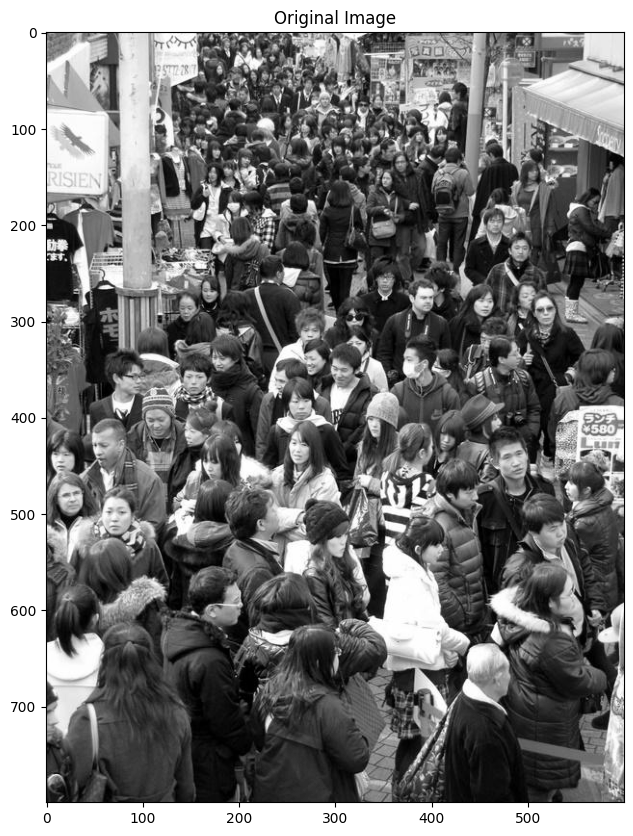

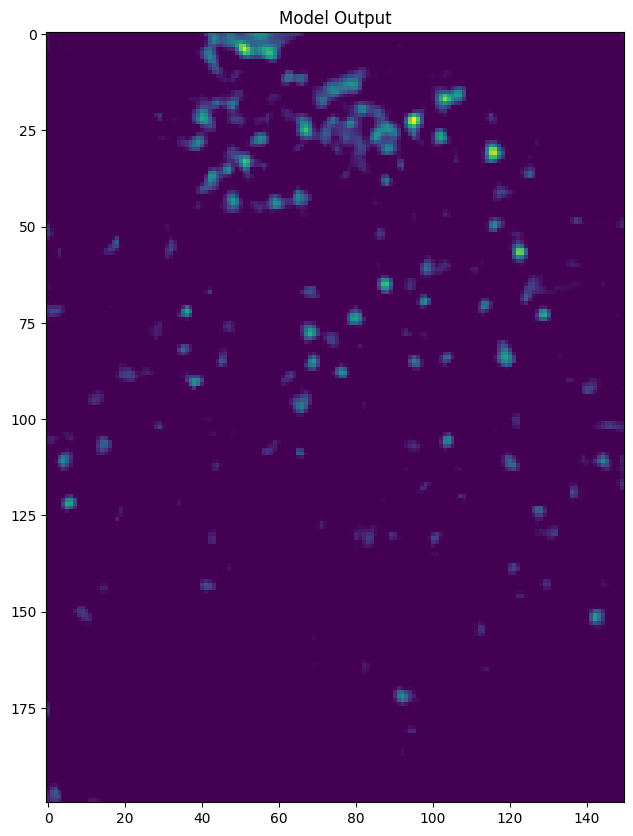

In [ ]:
# Load the specific image you want to use
image_path = 'image\IMG_23.jpg'
im = cv2.imread(image_path, cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Convert the image to float and normalize it to [0,   1]
im = im.astype(np.float32) /   255.0

# Convert the image to a PyTorch tensor and add a batch dimension
im_tensor = torch.from_numpy(im).unsqueeze(0)  # Only add one dimension for the batch size

# Pass the image through the model
output = model(im_tensor)

# Detach the output tensor from the computation graph and remove the batch dimension
output_image = output.detach().squeeze(0)

# Display the original image
plt.figure(figsize=(10,   10))
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.show()

# Display the model's output
plt.figure(figsize=(10,   10))
plt.imshow(output_image)
plt.title('Model Output')
plt.show()
